In [27]:
import pandas as pd
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np

movie_data = "data/movie_dataset.csv"
read_data = pd.read_csv(movie_data)
read_data.head()



,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton


In [28]:
# Number of movies without a director
directors_list =[]
seen_directors = set()
num = 0


for index, row in read_data.iterrows():
    try:
        director = row["director"].strip()
        if director not in seen_directors:
            directors_list.append(director)
            seen_directors.add(director)
    except:
        num = num + 1
   
print(f"Number of movies without a director: {num}")

Number of movies without a director: 36


In [29]:

#Top 5 directors with the highest revenue.
directors_revenue = read_data.groupby("director")["revenue"].sum()
top_5_directors = directors_revenue.sort_values(ascending=False).head(5)


print(top_5_directors.index.tolist())

['Steven Spielberg', 'Peter Jackson', 'James Cameron', 'Michael Bay', 'Christopher Nolan']


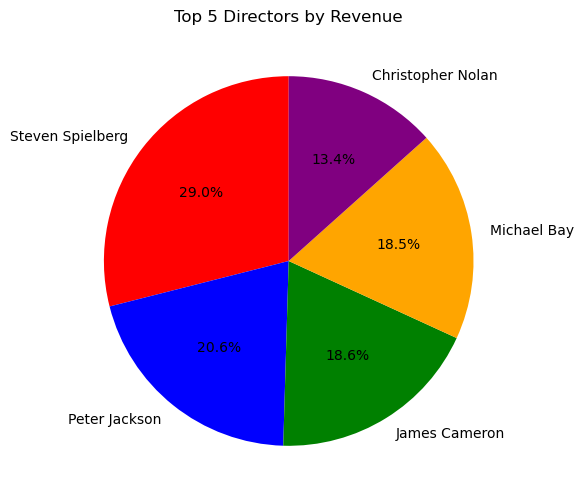

In [30]:
#Create a pie chart the Top 5 directors with the highest revenue
x_axis = np.arange(len(top_5_directors))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(12, 6))  
plt.pie(top_5_directors.values, labels=top_5_directors.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'orange', 'purple'])
plt.title('Top 5 Directors by Revenue')
plt.show()

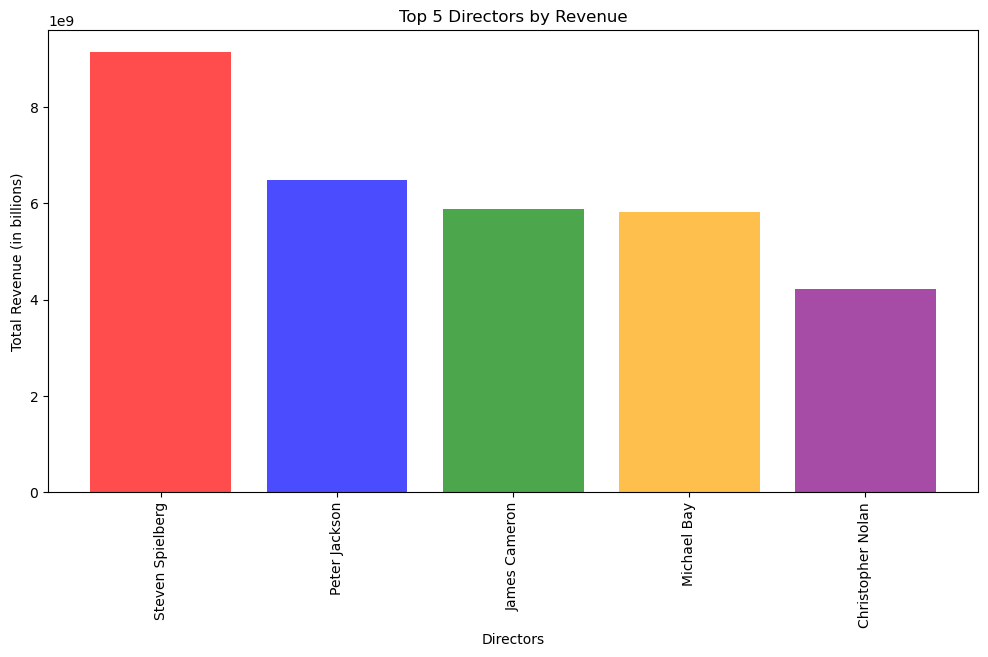

In [31]:
x_axis = np.arange(len(top_5_directors)) 
tick_locations = [value + 0.4 for value in x_axis] 

plt.figure(figsize=(12,6))  
plt.bar(x_axis, top_5_directors.values, color=['red', 'blue', 'green', 'orange', 'purple'], alpha=0.7, align="edge")  
plt.xticks(tick_locations, top_5_directors.index, rotation="vertical") 
plt.title('Top 5 Directors by Revenue')
plt.xlabel('Directors')
plt.ylabel('Total Revenue (in billions)')
plt.show()

In [ ]:
#top 5 directors(by Rev.) and their movies' release year

director_years = {}
for index, row in read_data.iterrows():
    try:
        director = row["director"].strip()
        release_date = row["release_date"]
        if release_date:
            year = release_date.split("-")[0]
            if director in directors_revenue_sorted.index:
                if director not in director_years:
                    director_years[director] = set()
                director_years[director].add(year)
    except:
        continue

# Print unique release years for the top 5 directors
print("\nUnique release years for each director (ordered by revenue):")
for director in directors_revenue_sorted.index:
    if director in director_years:
        print(f"{director}: {sorted(director_years[director])}")




Unique release years for each director (ordered by revenue):
Steven Spielberg: ['01', '03', '09', '11', '12', '13', '15', '16', '17', '18', '20', '21', '22', '23', '24', '25', '28', '29']
Peter Jackson: ['01', '02', '10', '11', '14', '18', '26']
James Cameron: ['01', '09', '10', '14', '18', '26']
Michael Bay: ['01', '06', '07', '13', '18', '19', '20', '21', '25', '27', '28']
Christopher Nolan: ['05', '10', '11', '14', '16', '19', '24']


In [41]:
director_movies = {}
for index, row in read_data.iterrows():
    try:
        director = row["director"].strip()
        title = row["title"].strip()
        if director in directors_revenue_sorted.index:
            if director not in director_movies:
                director_movies[director] = []
            director_movies[director].append(title)
    except Exception as e:
        continue

# Print movies for the top 5 directors
print("\nMovies by the top 5 directors (ordered by revenue):")
for director in directors_revenue_sorted.index:
    if director in director_movies:
        print(f"{director}: {', '.join(director_movies[director])}")




Movies by the top 5 directors (ordered by revenue):
Steven Spielberg: Indiana Jones and the Kingdom of the Crystal Skull, The BFG, War of the Worlds, The Adventures of Tintin, Minority Report, A.I. Artificial Intelligence, The Lost World: Jurassic Park, The Terminal, Munich, Hook, War Horse, Saving Private Ryan, Lincoln, Jurassic Park, Catch Me If You Can, Indiana Jones and the Last Crusade, Bridge of Spies, Amistad, 1941, Indiana Jones and the Temple of Doom, Schindler's List, Raiders of the Lost Ark, Close Encounters of the Third Kind, The Color Purple, Jaws, E.T. the Extra-Terrestrial, Twilight Zone: The Movie
Peter Jackson: The Hobbit: The Battle of the Five Armies, The Hobbit: The Desolation of Smaug, King Kong, The Hobbit: An Unexpected Journey, The Lord of the Rings: The Fellowship of the Ring, The Lovely Bones, The Lord of the Rings: The Return of the King, The Lord of the Rings: The Two Towers, Heavenly Creatures
James Cameron: Avatar, Titanic, Terminator 2: Judgment Day, Tru